**MILESTONE 2 PHASE 1**

---

# **`ALDANDI FITRA RAMADHAN HCK - 004`**

---

*DATASETS* : https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv

`latar belakang`
* Kepuasan penumpang pada maskapai penerbangan merupakan faktor penting yang secara signifikan dapat mempengaruhi keberhasilan suatu perusahaan penerbangan. Kepuasan pelanggan memainkan peran penting dalam membentuk reputasi maskapai penerbangan, karena merupakan indikator utama seberapa baik perusahaan memenuhi kebutuhan dan harapan pelanggannya. Pengalaman pelanggan yang positif dapat menghasilkan bisnis yang berulang dan iklan dari mulut ke mulut yang baik, sedangkan pengalaman negatif dapat menyebabkan hilangnya pelanggan, penurunan pendapatan, dan merusak citra merek perusahaan.

***Problem Statement***

**`Memprediksi kepuasan seseorang pada maskapai ini berdasarkan nilai kepuasan tiap service menggunakan ensemble learning.`**

*tujuan :*
* Agar tidak diperlukan pertanyaan puas atau tidak lagi pada akhirnya kepada penumpang.

> Common Questions
* Berapa rata-rata umur penumpang yang puas terhadap pelayanan?
* Berapa menit delay yang dapat ditoleransi terhadap kepuasan penumpang?
* Apakah jenis kelamin wanita lebih banyak menyatakan feedback bahwa mereka tidak puas?
* Berapa rata-rata jarak tempuh terbang setiap kelasnya?
* Bagaimana distribusi tipe travel penumpang terhadap kepuasannya?

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import chi2
from sklearn.model_selection import StratifiedKFold
from phik import phik_matrix
from sklearn.metrics import f1_score, make_scorer
import joblib
import warnings

# Ignore all warnings
warnings.simplefilter("ignore")

# **`DATA LOADING`**

In [3]:
# read csv
data = pd.read_csv('airplane_passenger_satisfication.csv')

`overview`

In [4]:
# showing top 5 data
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# showing 5 data from bottom
data.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [6]:
# display information from the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

`Data Fixing`

Ada Kolom yang memang tidak penting yang sepertinya kolom tersebut di export bersama index yaitu kolom 'Unnamed: 0'

In [7]:
# drop column Unnamed: 0
data.drop(columns='Unnamed: 0', inplace=True)

Mengganti semua spasi pada nama kolom dengan _

In [8]:
# change name of the column from whitespace to _
new_columns = [col.replace(' ', '_') for col in data.columns]
data.columns = new_columns

In [9]:
# checking null values
data.isnull().sum()

id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

Terlihat dari sini bahwa terdapat missing values pada `Arrival Delay in Minutes`.

`Missing Values Analysis`

In [10]:
# calculating correlation
corr = data.phik_matrix()

interval columns not set, guessing: ['id', 'Age', 'Flight_Distance', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']


In [11]:
# column that has correlation with 'Arrival_Delay_in_Minutes'
corr['Arrival_Delay_in_Minutes'].sort_values(ascending=False)

Arrival_Delay_in_Minutes             1.000000
Departure_Delay_in_Minutes           0.997610
Food_and_drink                       0.112003
Inflight_service                     0.048939
Leg_room_service                     0.036166
Checkin_service                      0.031806
On-board_service                     0.028616
Inflight_entertainment               0.027564
id                                   0.025716
Seat_comfort                         0.025541
Online_boarding                      0.022119
satisfaction                         0.016759
Baggage_handling                     0.011117
Ease_of_Online_booking               0.009371
Gender                               0.008501
Flight_Distance                      0.007174
Age                                  0.006658
Gate_location                        0.000000
Departure/Arrival_time_convenient    0.000000
Inflight_wifi_service                0.000000
Class                                0.000000
Type_of_Travel                    

Dari hasil diatas dapat diketahui bahwa `Arrival_Delay_in_Minutes` itu berpengaruh dengan `Departure_Delay_in_Minutes`. Maka akan di cek distribusi dari keduanya

`Arrival_Delay_in_Minutes MNAR (MISSING NOT AT RANDOM)`

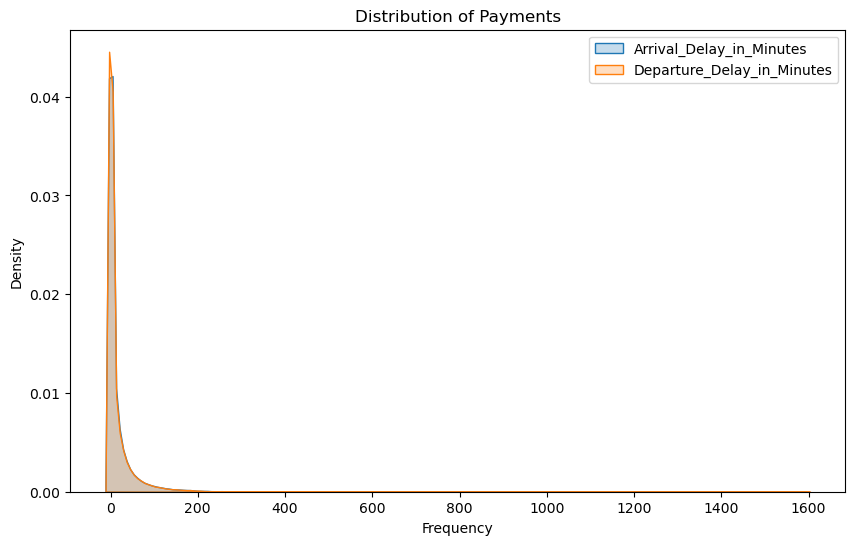

In [12]:
plt.figure(figsize=(10,6))

# Select the columns to plot
cols = ['Arrival_Delay_in_Minutes', 'Departure_Delay_in_Minutes']

# Plot the density curves for each column
for col in cols:
    sns.kdeplot(data[col], shade=True)

# Add legend and axis labels
plt.legend(cols)
plt.title('Distribution of Payments')
plt.xlabel('Frequency')
plt.ylabel('Density')

plt.show()

Dari hasil diatas dapat diketahui bahwa semakin tinggi Departure_Delay_in_Minutes maka semakin tinggi juga Arrival_Delay_in_Minutes.

In [13]:
# calculate the mean and median
data[cols].agg(['mean', 'median']).T

,mean,median
Arrival_Delay_in_Minutes,15.178678,0.0
Departure_Delay_in_Minutes,14.815618,0.0


Karena mean dari kedua kolom tersebut hampir sama maka akan di imputasi dengan mean

In [14]:
# Impute missing values in 'Arrival_Delay_in_Minutes' with the mean value
mean_value = data['Arrival_Delay_in_Minutes'].mean()
data['Arrival_Delay_in_Minutes'].fillna(mean_value, inplace=True)


In [15]:
data.isnull().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

`Check Duplicates`

In [16]:
# calculate duplicates
data.duplicated().sum()

0

Tidak ada duplikasi pada dataset ini

In [17]:
data[data['id'].duplicated()]

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction


Dan dapat diketahui bahwa 1 row 1 id customer.

## Train Test Split

In [18]:
# split
X = data.drop('satisfaction', axis=1)
y = data.satisfaction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(83123, 23)
(20781, 23)
(83123,)
(20781,)


In [19]:
# reset index every set
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# **`Exploratory Data Analysis`**

Target disini adalah satisfication dari seseorang pada kolom `satisfication`.

In [20]:
# new dataframe for eda
df_eda = pd.concat([X_train, y_train], axis=1)
df_eda.shape

(83123, 24)

In [21]:
df_eda.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,95224,Male,Loyal Customer,63,Personal Travel,Eco,496,1,4,5,...,1,5,4,4,3,5,1,0,0.0,neutral or dissatisfied
1,32403,Female,Loyal Customer,44,Business travel,Business,2083,1,1,1,...,4,4,4,4,1,4,1,0,0.0,satisfied
2,78623,Male,Loyal Customer,51,Business travel,Business,1426,2,1,2,...,5,5,5,5,4,5,3,0,0.0,satisfied
3,36827,Male,Loyal Customer,23,Business travel,Business,2167,4,4,4,...,4,5,3,2,1,5,4,0,0.0,satisfied
4,89920,Male,Loyal Customer,27,Business travel,Business,1487,4,2,2,...,4,2,4,2,2,3,4,0,0.0,neutral or dissatisfied


In [22]:
df_eda['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

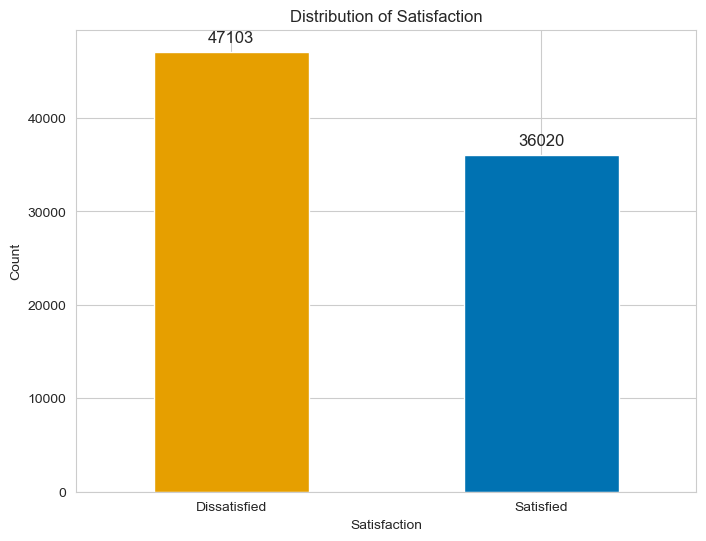

In [23]:
# Set figure size and style
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")

# Plot the target balance
ax = df_eda.groupby('satisfaction')['satisfaction'].count().plot(kind='bar', color=['#e69f00', '#0072b2'])

# Add labels and title
ax.set_xlabel("Satisfaction")
ax.set_ylabel("Count")
ax.set_title("Distribution of Satisfaction")
ax.set_xticklabels(['Dissatisfied', 'Satisfied'], rotation=0)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()


Dari visualisasi diatas dapat diketahui bahwa target mengalami imbalance, tetapi tidak begitu besar dimana berarti pada maskapai ini lebih banyak yang tidak puas dalam pelayanannya.

In [24]:
# display average age based on target
df_eda.groupby("satisfaction")[["Age"]].mean()

,Age
satisfaction,
neutral or dissatisfied,37.499098
satisfied,41.758717


Rata-rata umur dikeduanya hampir sama, yaitu kurang lebih 40 tahun. Ini tidak bisa mengambil kesimpulan dari sini

In [25]:
# display average delay based on target
df_eda.groupby("satisfaction")[["Arrival_Delay_in_Minutes", "Departure_Delay_in_Minutes"]].mean()

,Arrival_Delay_in_Minutes,Departure_Delay_in_Minutes
satisfaction,,
neutral or dissatisfied,17.057387,16.429230
satisfied,12.699474,12.656913


Dari hasil diatas kita dapat ketahui bahwa orang-orang yang tidak puas pelayanannya memiliki delay lebih dari 15 menit.

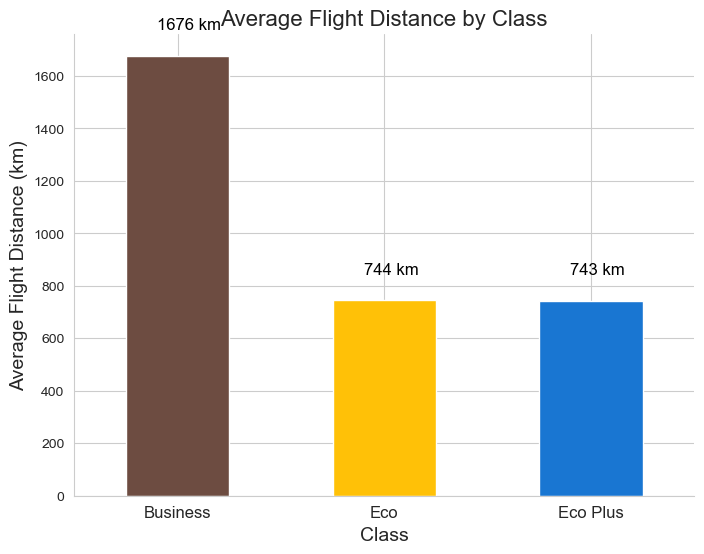

In [26]:
# Calculate the average flight distance for each class
class_avg_flight_distance = df_eda.groupby("Class")["Flight_Distance"].mean()

# Create a bar chart to visualize the average flight distance for each class
fig, ax = plt.subplots(figsize=(8,6))
colors = ["#6D4C41", "#FFC107", "#1976D2"] # Customize the colors of the bars
class_avg_flight_distance.plot(kind='bar', color=colors, ax=ax)

# Add labels and title to the chart
ax.set_xlabel("Class", fontsize=14)
ax.set_ylabel("Average Flight Distance (km)", fontsize=14)
ax.set_title("Average Flight Distance by Class", fontsize=16)

# Customize the tick labels
ax.tick_params(axis='x', labelsize=12, rotation=0)

# Remove the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add data labels to the bars
for i, v in enumerate(class_avg_flight_distance.values):
    ax.text(i-0.1, v+100, f"{int(v)} km", color='black', fontsize=12)

plt.show()

Berdasarkan visualisasi diatas, terlihat jelas bahwa penumpang Kelas Business cenderung memiliki jarak rata-rata penerbangan terjauh, dengan jarak rata-rata lebih dari 1500 km. Economy dan Eco Plus memiliki jarak penerbangan rata-rata yang jauh lebih rendah, dengan jarak rata-rata masing-masing sekitar 700 km.

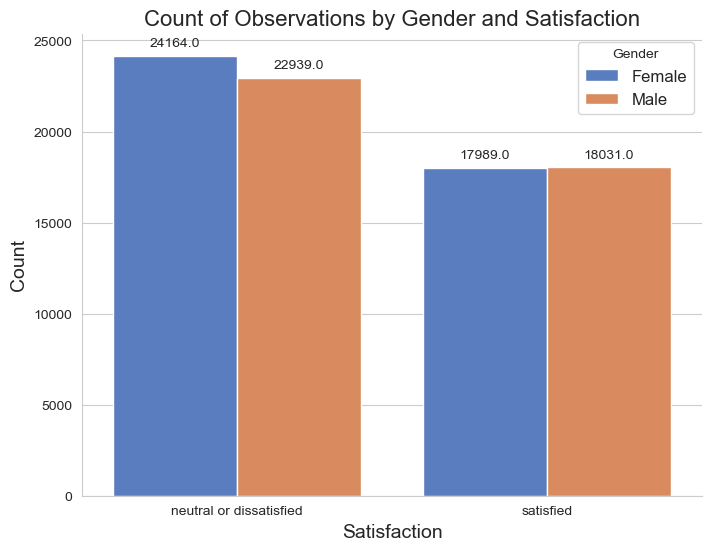

In [27]:
# Set figure size
plt.figure(figsize=(8, 6))

# Group by satisfaction and gender, and count the number of observations
grouped = df_eda.groupby(['satisfaction', 'Gender']).size().reset_index(name='count')

# Create a bar plot using seaborn
sns.set_palette("muted")
ax = sns.barplot(data=grouped, x='satisfaction', y='count', hue='Gender')

# Set axis labels and title
plt.xlabel('Satisfaction', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Observations by Gender and Satisfaction', fontsize=16)

# Add legend
plt.legend(title='Gender', loc='upper right', fontsize=12)

# Remove top and right spines
sns.despine()

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points', fontsize=10)

# Add grid lines
ax.yaxis.grid(True)

# Show the plot
plt.show()

Pada maskapai ini rata-rata penumpang yang memberikan feedback kepuasan mereka adalah wanita.

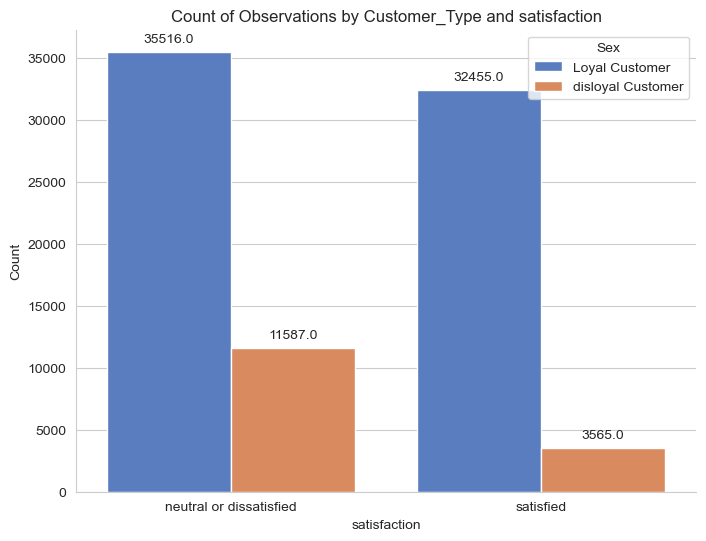

In [28]:
# Set figure size
plt.figure(figsize=(8, 6))

# Group by satisfaction and sex, and count the number of observations
grouped = df_eda.groupby(['satisfaction', 'Customer_Type']).size().reset_index(name='count')

# Create a bar plot using seaborn
ax = sns.barplot(data=grouped, x='satisfaction', y='count', hue='Customer_Type')

# Set axis labels and title
plt.xlabel('satisfaction')
plt.ylabel('Count')
plt.title('Count of Observations by Customer_Type and satisfaction')

# Add legend
plt.legend(title='Sex', loc='upper right')

# Remove top and right spines
sns.despine()

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Show the plot
plt.show()

Dapat dilihat dari visualisasi diatas bahwa memang lebih banyak yang memberikan feedback dari loyal customer karena mereka sering memakai maskapai ini.

# **`Feature Selection & Engineering`**

`checking multicolinearity`

In [29]:
# memasukan fitur numerik
numeric_columns = ['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
X = df_eda[numeric_columns]

# membuat dataframe VIF dan membaca semua dataframe menggunakan func variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display
print(vif_data.sort_values(by='VIF', ascending=False))

                      feature        VIF
3    Arrival_Delay_in_Minutes  15.253421
2  Departure_Delay_in_Minutes  15.212453
0                         Age   2.288527
1             Flight_Distance   2.200651


Dapat kita ketahui bahwa memang kolom delay itu saling berpengaruh maka terdapat mulitkolinearitas yang tinggi

`checking cardinallity`

In [30]:
df_eda.drop(columns=['id', 'Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']).nunique()

Gender                               2
Customer_Type                        2
Type_of_Travel                       2
Class                                3
Inflight_wifi_service                6
Departure/Arrival_time_convenient    6
Ease_of_Online_booking               6
Gate_location                        6
Food_and_drink                       6
Online_boarding                      6
Seat_comfort                         6
Inflight_entertainment               6
On-board_service                     6
Leg_room_service                     6
Baggage_handling                     5
Checkin_service                      6
Inflight_service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

Tidak ada high cardinallity yang terjadi pada dataset ini.

`checking correlation`

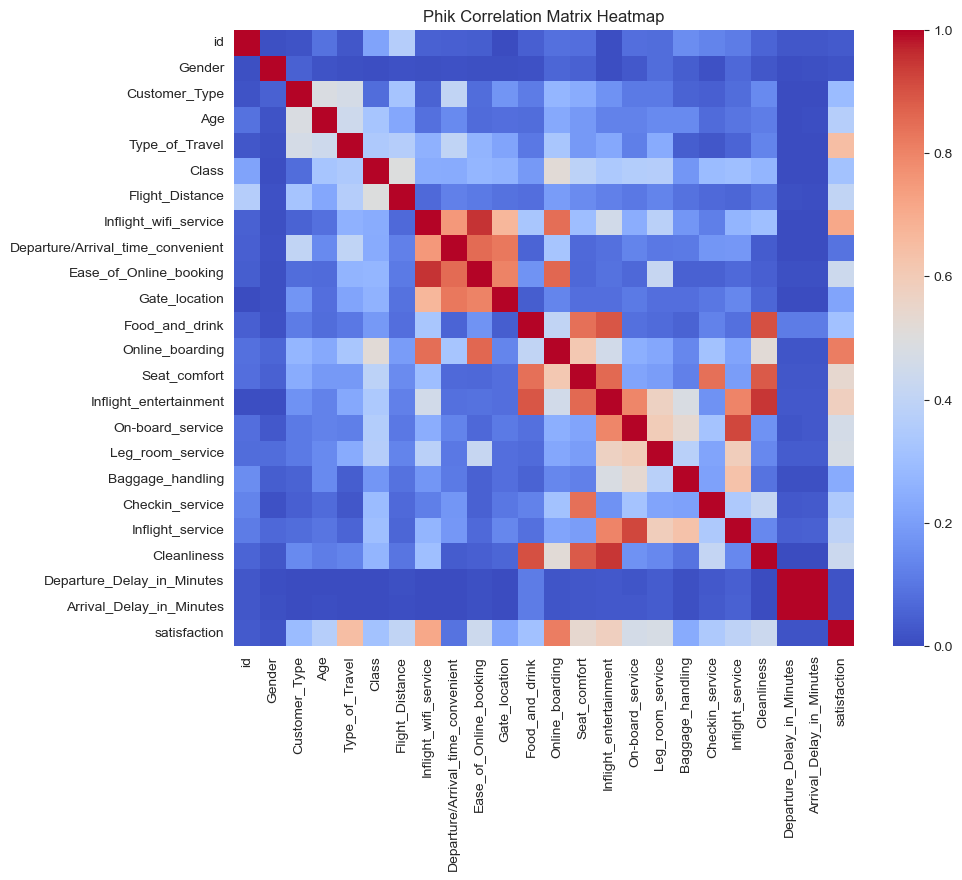

In [31]:
# Display
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Phik Correlation Matrix Heatmap')
plt.show()

In [32]:
# display correlation just based on satisfaction has values more than 0.3
corr_satisfaction = corr['satisfaction'].sort_values(ascending=False)
corr_satisfaction[corr_satisfaction > 0.3]

satisfaction              1.000000
Online_boarding           0.814097
Inflight_wifi_service     0.712281
Type_of_Travel            0.648219
Inflight_entertainment    0.581527
Seat_comfort              0.538059
Leg_room_service          0.476109
On-board_service          0.461286
Ease_of_Online_booking    0.438925
Cleanliness               0.435520
Flight_Distance           0.405954
Inflight_service          0.391924
Age                       0.369903
Checkin_service           0.345286
Class                     0.313504
Food_and_drink            0.310856
Name: satisfaction, dtype: float64

Dapat dilihat memang satisfaction berhubungan dengan rating-rating feedback dari customer berdasarkan pelayanannya. Selain itu, Age juga berhubungan yang mempunyai value lebih dari 0.3.

Karena Menurut asumsi saya delay nya pesawat juga dapat mempengaruhi kepuasan seseorang saya akan memakai 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes' juga untuk fitur.

New Features :
* Age
* Type_of_Travel
* Class
* Flight_Distance
* Inflight_wifi_service
* Ease_of_Online_booking
* Food_and_drink
* Online_boarding
* Seat_comfort
* Inflight_entertainment
* On-board_service
* Leg_room_service
* Checkin_service
* Inflight_service
* Cleanliness
* Departure_Delay_in_Minutes
* Arrival_Delay_in_Minutes

Karena 'Departure_Delay_in_Minutes' dan 'Arrival_Delay_in_Minutes' memiliki banyak nilai 0, karena nilai 0 itu artinya tidak delay, maka kolom tersebut akan diubah menjadi kolom kategorik

In [33]:
# membuat function untuk kolom 'Departure_Delay_in_Minutes' dan 'Arrival_Delay_in_Minutes' 
def delay_level(delay_time):
    if delay_time == 0:
        return "no delay"
    elif delay_time <= 13:
        return "little delay"
    elif delay_time <= 15:
        return "delayed"
    else:
        return "very delayed"

In [34]:
# Transform the Departure_Delay_in_Minutes and Arrival_Delay_in_Minutes columns
df_eda['Departure_Delay_in_Minutes'] = df_eda['Departure_Delay_in_Minutes'].apply(delay_level)
df_eda['Arrival_Delay_in_Minutes'] = df_eda['Arrival_Delay_in_Minutes'].apply(delay_level)

In [35]:
df_eda[['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']].sample(5)

,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
69964,little delay,no delay
64436,little delay,little delay
70864,very delayed,very delayed
54494,little delay,no delay
48856,no delay,no delay


Kedua kolom tersebut sudah terubah menjadi kolom kategorik

In [36]:
new_features = ['Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Ease_of_Online_booking','Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Checkin_service', 'Inflight_service','Cleanliness', 
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
target = ['satisfaction']

In [37]:
# List of columns to encode
xle = df_eda[new_features]
cols_to_encode = ['Type_of_Travel', 'Class', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

# Create an instance of the LabelEncoder
le = LabelEncoder()

# Apply label encoding to the selected columns
for col in cols_to_encode:
    xle[col] = le.fit_transform(xle[col])

Karena memiliki banyak fitur kategorik, maka untuk mempertimbangkan fitur akan digunakan metode chi2

In [38]:
f_test = SelectKBest(score_func=chi2, k=4)
fit = f_test.fit(xle, df_eda[target])
#hasil uji signifikansi
result = pd.Series(fit.scores_)
result.index = xle.columns
result.sort_values(ascending=False)

Flight_Distance               6.271253e+06
Online_boarding               1.177594e+04
Type_of_Travel                1.155696e+04
Class                         1.087487e+04
Age                           9.412910e+03
Inflight_entertainment        6.982390e+03
Seat_comfort                  5.092184e+03
Inflight_wifi_service         4.363275e+03
On-board_service              4.207002e+03
Leg_room_service              4.186392e+03
Cleanliness                   4.100112e+03
Checkin_service               2.187391e+03
Food_and_drink                2.026127e+03
Inflight_service              1.884710e+03
Ease_of_Online_booking        1.746423e+03
Departure_Delay_in_Minutes    3.501331e+01
Arrival_Delay_in_Minutes      2.596643e+01
dtype: float64

Dari sini juga dapat dilihat bahwa fitur yang dipilih mempunyai nilai chi2 yang tinggi terhadap target, dimana dapat menyimpulkan pemilihan fitur ini benar.

In [39]:
# membuat dataframe baru
df_eda_new = df_eda[new_features + target]

In [40]:
df_eda_new.head()

,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,63,Personal Travel,Eco,496,1,5,1,5,1,1,5,4,3,5,1,no delay,no delay,neutral or dissatisfied
1,44,Business travel,Business,2083,1,1,5,1,4,4,4,4,1,4,1,no delay,no delay,satisfied
2,51,Business travel,Business,1426,2,2,5,5,4,5,5,5,4,5,3,no delay,no delay,satisfied
3,23,Business travel,Business,2167,4,4,4,4,4,4,5,3,1,5,4,no delay,no delay,satisfied
4,27,Business travel,Business,1487,4,2,4,3,4,4,2,4,2,3,4,no delay,no delay,neutral or dissatisfied


Age Skewness : 0.0011065732360109085


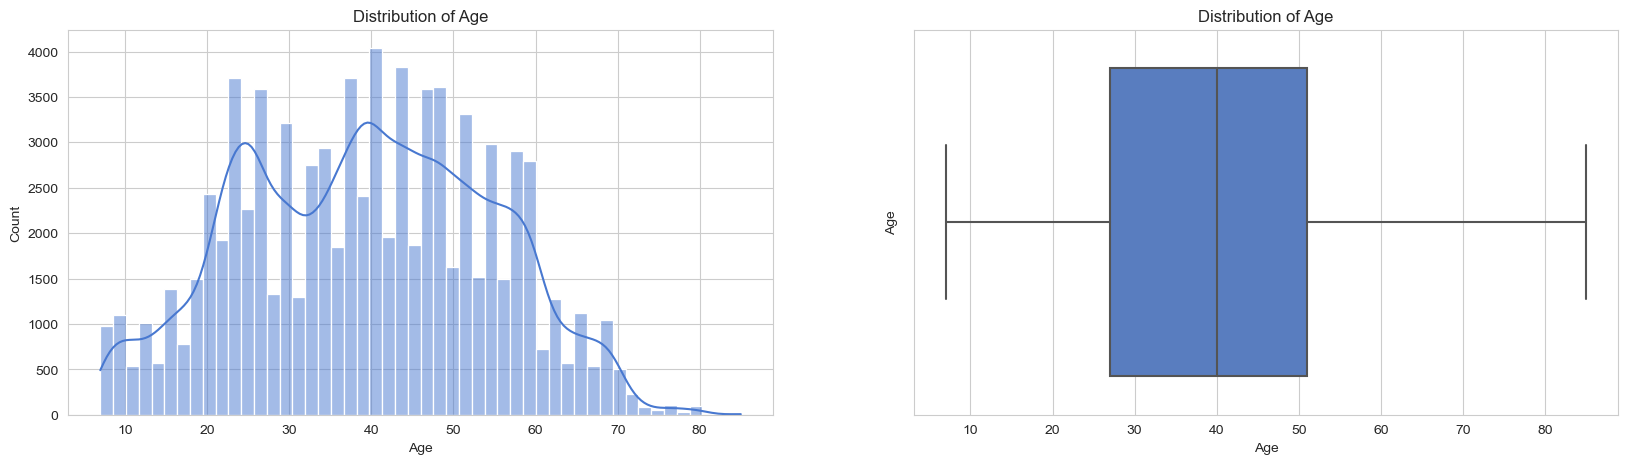

In [41]:
#menghitung skewness
skew_Age = df_eda_new['Age'].skew()
print(f'Age Skewness : {skew_Age}')

# melihat distribusi memakai histogram
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.histplot(df_eda_new['Age'], ax=ax1, bins=50, kde=True)
ax1.set_xlabel('Age')
ax1.set_title('Distribution of Age')
sns.boxplot(df_eda_new['Age'], ax=ax2)
ax2.set_ylabel('Age')
ax2.set_title('Distribution of Age')
plt.show()

Dapat diketahui bahwa kolom Age mempunyai distribusi yang normal dan tidak mempunyai outliers.

Flight_Distance Skewness : 1.1101668544749683


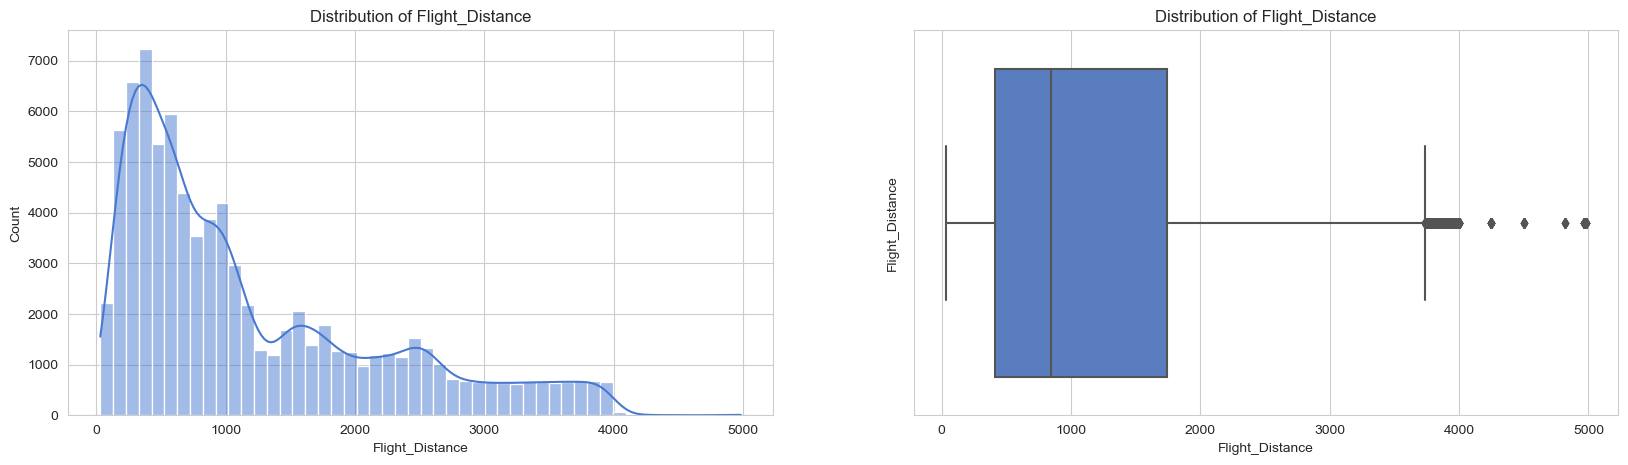

In [42]:
#menghitung skewness
skew_Flight_Distance = df_eda_new['Flight_Distance'].skew()
print(f'Flight_Distance Skewness : {skew_Flight_Distance}')

# melihat distribusi memakai histogram
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.histplot(df_eda_new['Flight_Distance'], ax=ax1, bins=50, kde=True)
ax1.set_xlabel('Flight_Distance')
ax1.set_title('Distribution of Flight_Distance')
sns.boxplot(df_eda_new['Flight_Distance'], ax=ax2)
ax2.set_ylabel('Flight_Distance')
ax2.set_title('Distribution of Flight_Distance')
plt.show()

Pada Flight_Distance memiliki distribusi yang tidak normal dan mempunyai beberapa outliers. Ini akan di handling menggunakan IQR atau Tukey Rules

`Encoding and Preprocess`

In [43]:
# mendefinisikan setiap preprocess
# memakai standardscaler karena memiliki distribusi yang sangat normal
age_feat = ['Age']
age_feat_transformer = StandardScaler()

# type of travel memakai onehotencoder karena kolom ini merupakan kolom tipe yang mempunyai nilai equality
type_feat = ['Type_of_Travel']
type_feat_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# class memakai ordinal encoder karena kolom ini merupakan tingkatan kelas maskapai
class_ord = ['Eco', 'Eco Plus', 'Business']
class_feat = ['Class']
class_feat_transformer = OrdinalEncoder(categories=[class_ord])

# flight distance merupakan kolom yang mempunyai beberapa outliers, dan outliers akan di capping serta di encoding menggunakan standardscaler
distance_feat = ['Flight_Distance']
distance_feat_transformer = Pipeline(
    steps=[('windsorizer1', Winsorizer(capping_method='iqr', tail='both', fold=1.5)), 
           ("scaler1", StandardScaler())]
)

# memakai ordinal encoder karena ini merupakan tingkat kepuasan berdasarkan service
ord_service = [0,1,2,3,4,5]
ord_service.sort()
ord_cols = ['Inflight_wifi_service', 'Ease_of_Online_booking', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Checkin_service',
       'Inflight_service', 'Cleanliness']
ord_cols_transformer = OrdinalEncoder(categories=[ord_service]*len(ord_cols))

delay_ord = ['no delay', 'little delay', 'delayed', 'very delayed']
delay_cols = ['Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']
delay_cols_transformer = OrdinalEncoder(categories=[delay_ord]*len(delay_cols))

In [44]:
preprocessor = ColumnTransformer(transformers=[
    ('age_feat', age_feat_transformer, age_feat),
    ('type_feat', type_feat_transformer, type_feat),
    ('class_feat', class_feat_transformer, class_feat),
    ('distance_feat', distance_feat_transformer, distance_feat),
    ('ord_cols', ord_cols_transformer, ord_cols),
    ('delay_cols', delay_cols_transformer, delay_cols)
])

`Split After EDA`

In [45]:
X_train_new = df_eda_new.drop(columns='satisfaction')
y_train_new = df_eda_new.satisfaction


In [46]:
X_test_new = X_test[new_features]

In [47]:
X_test_new['Departure_Delay_in_Minutes'] = X_test_new['Departure_Delay_in_Minutes'].apply(delay_level)
X_test_new['Arrival_Delay_in_Minutes'] = X_test_new['Arrival_Delay_in_Minutes'].apply(delay_level)

# **`Model Definition, Training, Evaluation`**

Menggunakan Model Ensemble Learning yaitu :
* Random Forest
* XGBoost

Saya menggunakan model ensemble learning kedua model tersebut karena pada kasus ini saya mencari keakuratan untuk memprediksi kedua kelas. Oleh karena itu, Keuntungan utama Random Forest dan XGBoost adalah keduanya merupakan metode ensemble learning yang menggabungkan beberapa model untuk meningkatkan performa prediksi. Hal ini dapat menghasilkan akurasi yang lebih baik dan lebih sedikit overfitting dibandingkan dengan menggunakan model lain. Keduanya juga memungkinkan analisis kepentingan fitur, yang dapat membantu mengidentifikasi variabel terpenting dalam kumpulan data.

**`Random Forest`**

In [48]:
# menyimpan pipeline untuklogreg
pl_rf = Pipeline(
    steps=[("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5))]
)

In [49]:
# melakukan fit ke data train
pl_rf.fit(X_train_new, y_train_new)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('age_feat', StandardScaler(),
                                                  ['Age']),
                                                 ('type_feat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Type_of_Travel']),
                                                 ('class_feat',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']]),
                                                  ['Class']),
                                                 ('distance_feat',
                                                  Pipeline(steps=[('windsorizer1',
                                                                   Winsorizer(capping_met...
                                                   'On-board_service',
                                                   'Leg_room_service',
                                                   'Checkin_service',
                                                   'Inflight_service',
                                                   'Cleanliness']),
                                                 ('delay_cols',
                                                  OrdinalEncoder(categories=[['no '
                                                                              'delay',
                                                                              'little '
                                                                              'delay',
                                                                              'delayed',
                                                                              'very '
                                                                              'delayed'],
                                                                             ['no '
                                                                              'delay',
                                                                              'little '
                                                                              'delay',
                                                                              'delayed',
                                                                              'very '
                                                                              'delayed']]),
                                                  ['Departure_Delay_in_Minutes',
                                                   'Arrival_Delay_in_Minutes'])])),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [50]:
#predict
pred_train_rf = pl_rf.predict(X_train_new)
pred_test_rf = pl_rf.predict(X_test_new)

Confusion Matrix      : 


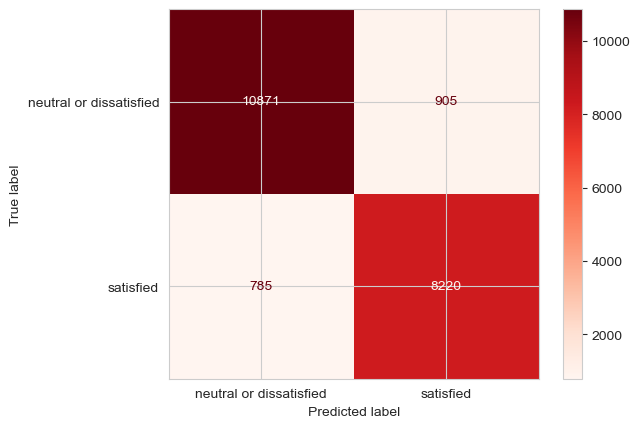

In [51]:
#display confusion matrix untuk xgboost
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pl_rf, X_test_new, y_test, cmap='Reds'))

Berdasarkan hasil tersebut, dapat disimpulkan bahwa model telah bekerja dengan baik dalam memprediksi kelas positif dan negatif. Namun, terdapat kesalahan mengklasifikasikan 874 sampel negatif sebagai positif (FP), yang berarti masih ada ruang untuk perbaikan dalam kemampuan model untuk mengidentifikasi sampel yang benar-benar negatif.

In [52]:
#melihat classification report atau hasil permodelan
print('Classification Report Random Forest Train : \n', classification_report(y_train_new, pred_train_rf), '\n')

# Menghitung ROC
probarf_train = pl_rf.predict_proba(X_train_new)
print('ROC', roc_auc_score(y_train_new, probarf_train[:,1]), '\n')


print('Classification Report Random Forest Test : \n', classification_report(y_test, pred_test_rf), '\n')

# Menghitung ROC
probarf_test = pl_rf.predict_proba(X_test_new)
print('ROC', roc_auc_score(y_test, probarf_test[:,1]), '\n')

Classification Report Random Forest Train : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.93      0.93     47103
              satisfied       0.91      0.91      0.91     36020

               accuracy                           0.92     83123
              macro avg       0.92      0.92      0.92     83123
           weighted avg       0.92      0.92      0.92     83123
 

ROC 0.971862584321012 

Classification Report Random Forest Test : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.92      0.93     11776
              satisfied       0.90      0.91      0.91      9005

               accuracy                           0.92     20781
              macro avg       0.92      0.92      0.92     20781
           weighted avg       0.92      0.92      0.92     20781
 

ROC 0.9705539730720252 



* Berdasarkan classification report, model terlihat goodfit. precision, recall, dan skor f1 tinggi untuk train set dan test set, dengan hanya sedikit penurunan untuk test set pada precision untuk kelas satisfied, seperti yang diharapkan. accuracy juga tinggi untuk kedua set. Selain itu, macro avg dan weighted avg untuk kedua set sangat mirip, yang menunjukkan bahwa model bekerja secara konsisten di kedua kelas yang berbeda.
* Selain itu, skor ROC untuk data train set dan test set tinggi dan mendekati 1, menunjukkan bahwa model tersebut memiliki tingkat true positive yang tinggi dan tingkat false positive yang rendah, yang berarti bahwa model tersebut mampu membedakan dengan baik antara kelas positif dan negatif.

**`XGBoost`**

Karena model xgboost harus numerik maupun pada kolom target

In [53]:
# mereplace menjadi 0 dan 1 pada kolom target
y_train_xg = y_train_new.replace({'neutral or dissatisfied': 0, 'satisfied': 1})

In [54]:
y_test_xg = y_test.replace({'neutral or dissatisfied': 0, 'satisfied': 1})

In [55]:
# menyimpan pipeline untuk preprocess dan model
pl_xgboost = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier" ,XGBClassifier(n_estimators=200,random_state=42))]
)

In [56]:
# melakukan fit ke data train
pl_xgboost.fit(X_train_new, y_train_xg)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('age_feat', StandardScaler(),
                                                  ['Age']),
                                                 ('type_feat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Type_of_Travel']),
                                                 ('class_feat',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']]),
                                                  ['Class']),
                                                 ('distance_feat',
                                                  Pipeline(steps=[('windsorizer1',
                                                                   Winsorizer(capping_met...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [57]:
#predict
pred_train_xgboost = pl_xgboost.predict(X_train_new)
pred_test_xgboost = pl_xgboost.predict(X_test_new)

Confusion Matrix      : 


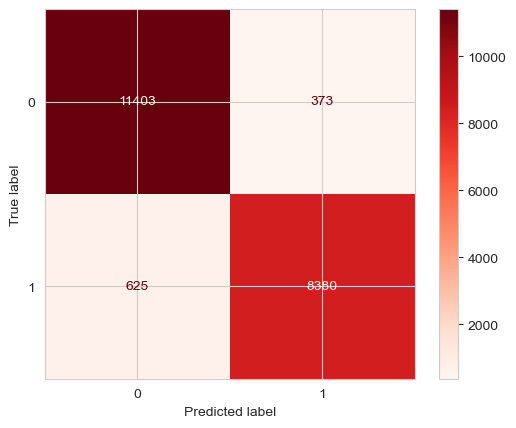

In [58]:
#display confusion matrix untuk xgboost
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pl_xgboost, X_test_new, y_test_xg, cmap='Reds'))

Secara keseluruhan, model tersebut tampaknya berkinerja baik, dengan jumlah true positive dan true negative yang tinggi. Namun, jumlah falsenegative yang relatif tinggi (373) menunjukkan bahwa mungkin ada beberapa contoh di mana model salah memprediksi 'neutral or disatisfied' yang actualnya  adalah 'satisfied'.

In [59]:
#melihat classification report atau hasil permodelan
print('Classification Report XGBoost Train : \n', classification_report(y_train_xg, pred_train_xgboost), '\n')

# Menghitung ROC
probaxgboost_train = pl_xgboost.predict_proba(X_train_new)
print('ROC', roc_auc_score(y_train_xg, probaxgboost_train[:,1]), '\n')


print('Classification Report XGBoost Test : \n', classification_report(y_test_xg, pred_test_xgboost), '\n')

# Menghitung ROC
probaxgboost_test = pl_xgboost.predict_proba(X_test_new)
print('ROC', roc_auc_score(y_test_xg, probaxgboost_test[:,1]), '\n')

Classification Report XGBoost Train : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     47103
           1       0.98      0.97      0.97     36020

    accuracy                           0.98     83123
   macro avg       0.98      0.98      0.98     83123
weighted avg       0.98      0.98      0.98     83123
 

ROC 0.9982621749354726 

Classification Report XGBoost Test : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     11776
           1       0.96      0.93      0.94      9005

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781
 

ROC 0.9919009319626173 



Model XGBoost memiliki accuracy tinggi dan skor F1 pada set data train set dan test set, dengan skor precision dan recall yang sangat tinggi. Selain itu, skor ROC juga tinggi, menunjukkan bahwa model bekerja dengan baik dalam membedakan kedua kelas. Hasil ini menunjukkan bahwa model XGBoost cocok untuk data dan memiliki kekuatan prediksi yang tinggi, mengungguli model Random Forest. Namun, model mungkin masih overfitting ke data train set, karena skor train set sedikit lebih tinggi daripada skor test set.

**`Cross Validation`**

In [60]:
#mendefinisika stratified kfold
skfold=StratifiedKFold(n_splits=5)

Menfokuskan ke Accuracy karena ingin keakuratannya dalam memprediksi kedua kelas.

In [61]:
#mendefinisikan tiap model
models = [
    pl_rf.named_steps['classifier'],
    pl_xgboost.named_steps['classifier']
]

# Evaluate each model using cross-validation
for model in models:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    scores = cross_val_score(pipe, X_train_new, y_train_xg, cv=skfold, scoring='accuracy')
    print(f"{model.__class__.__name__} accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")


RandomForestClassifier accuracy: 0.9202 (+/- 0.0026)
XGBClassifier accuracy: 0.9508 (+/- 0.0020)


Dari hasil crossvalidation, dapat disimpulkan bahwa model XGBClassifier memiliki kinerja yang lebih baik daripada model RandomForestClassifier dalam memprediksi kepuasan pelanggan berdasarkan dataset yang diberikan. XGBClassifier memiliki akurasi rata-rata 0,9508 dengan standar deviasi 0,0020, sedangkan RandomForestClassifier memiliki akurasi rata-rata 0,9213 dengan standar deviasi 0,0021. Hal ini menunjukkan bahwa model XGBClassifier lebih konsisten dan akurat dalam memprediksi kepuasan pelanggan dibandingkan dengan model RandomForestClassifier.

**Best Model** : `XGBoost`

Akan tetapi, untuk meningkatkan keakuratan lagi, akan dibutuhkan hyperparameter-tuning agar mempunyai hasil yang maksimal.

`Hyperparameter-Tuning`

In [62]:
# Define parameter grid for GridSearchCV
param_grid_xgboost = {
    'classifier__n_estimators': [100, 150], # Meningkatkan nilai ini dapat meningkatkan performa model tetapi juga dapat meningkatkan risiko overfitting.
    'classifier__max_depth': [3,7], # depth yang lebih dalam dapat menangkap interaksi yang lebih kompleks antara variabel, tetapi juga dapat meningkatkan risiko overfitting.
    'classifier__learning_rate': [0.1], # lebih rendah dapat meningkatkan kinerja generalisasi tetapi mungkin juga membutuhkan lebih banyak iterasi untuk konvergen.
    'classifier__subsample': [0.7, 1], # Nilai yang lebih rendah dapat mencegah overfitting tetapi juga dapat menurunkan performa model.
}

# Perform GridSearchCV
grid_search_xgboost = GridSearchCV(pl_xgboost, param_grid=param_grid_xgboost, cv=skfold, scoring='accuracy')
grid_search_xgboost.fit(X_train_new, y_train_xg)

# Print best parameters and score
print("Best parameters found on training set:")
print(grid_search_xgboost.best_params_)
print("Best score found on training set:")
print(grid_search_xgboost.best_score_)

Best parameters found on training set:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 150, 'classifier__subsample': 0.7}
Best score found on training set:
0.9514093728064145


Setelah melakukan hyperparametertuning menggunakan GridSearchCV di XGBoost, parameter terbaik yang ditemukan pada train set adalah: learning_rate = 0.1, max_depth = 7, n_estimators = 150, dan subsample = 0.7. Skor terbaik yang ditemukan pada train set adalah 0,9514. Hyperparameter ini dapat digunakan untuk lebih meningkatkan kinerja model XGBoost.

In [63]:
#menggunakan best parameter untuk xgboost
bestmodel = grid_search_xgboost.best_estimator_

#definition
bestmodel.fit(X_train_new, y_train_xg)
#training
model_train = bestmodel.predict(X_train_new)
model_test = bestmodel.predict(X_test_new)
#evaluation
print('Train', classification_report(y_train_xg, model_train))
print('Test', classification_report(y_test_xg, model_test))

Train               precision    recall  f1-score   support

           0       0.96      0.98      0.97     47103
           1       0.97      0.94      0.96     36020

    accuracy                           0.96     83123
   macro avg       0.97      0.96      0.96     83123
weighted avg       0.96      0.96      0.96     83123

Test               precision    recall  f1-score   support

           0       0.95      0.97      0.96     11776
           1       0.96      0.93      0.95      9005

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



Setelah hyperparameter tuning model XGBoost, accuracy pada train set meningkat menjadi 0,96, lebih tinggi dari skor sebelumnya 0,95. Demikian pula, accuracy pada test set juga meningkat dari 0,95 menjadi 0,96. precision, recall, dan skor F1 untuk kedua kelas juga meningkat setelah hyperparameter tuning. Secara keseluruhan, model XGBoost dengan hyperparameter yang disetel bekerja lebih baik daripada model XGBoost default.

`Menganalisis titik data yang salah pada test set`

In [64]:
# membuat dataframe actual dan predict
actvspred = pd.DataFrame()
actvspred['Actual'] = y_test_xg
actvspred['Predict'] = model_test

actvspred = pd.concat([X_test_new, actvspred], axis=1)

In [65]:
#melihat titik data yang salah dalam FalseNegative
actvspred[(actvspred['Actual']==0) & (actvspred['Predict']==1)]

,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Actual,Predict
29,65,Business travel,Business,2650,2,2,4,4,4,3,3,3,3,3,3,little delay,very delayed,0,1
54,55,Business travel,Business,1849,4,4,3,1,3,4,4,4,1,4,4,little delay,no delay,0,1
111,28,Business travel,Eco,820,4,5,4,5,4,4,4,5,4,4,4,no delay,no delay,0,1
150,34,Business travel,Business,110,1,4,4,3,2,4,4,4,2,4,1,no delay,no delay,0,1
179,45,Personal Travel,Eco,1089,4,4,2,2,5,3,3,4,3,3,5,little delay,no delay,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,30,Business travel,Business,1475,4,4,4,4,4,4,5,5,3,5,4,little delay,little delay,0,1
20202,43,Business travel,Eco Plus,265,4,5,4,4,4,4,4,2,2,4,4,no delay,no delay,0,1
20422,25,Business travel,Business,1703,2,2,2,5,5,3,3,5,5,4,5,very delayed,very delayed,0,1
20523,48,Business travel,Eco,334,4,3,4,2,2,3,3,4,1,3,3,no delay,no delay,0,1


In [66]:
#melihat titik data yang salah dalam FalsePositive
actvspred[(actvspred['Actual']==1) & (actvspred['Predict']==0)]

,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Actual,Predict
30,50,Personal Travel,Business,96,4,0,3,4,4,3,3,0,4,3,4,no delay,little delay,1,0
41,56,Personal Travel,Eco Plus,462,4,4,3,4,3,3,4,2,5,4,3,little delay,very delayed,1,0
67,55,Personal Travel,Eco Plus,331,4,4,2,4,2,2,1,5,2,3,2,no delay,no delay,1,0
117,46,Business travel,Business,1287,4,4,3,4,3,3,4,2,3,4,3,no delay,no delay,1,0
126,38,Personal Travel,Eco,297,4,4,5,4,5,5,3,4,4,3,5,no delay,no delay,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,29,Business travel,Business,1312,4,4,1,4,1,1,5,3,4,5,1,little delay,little delay,1,0
20679,38,Personal Travel,Eco,907,4,3,1,3,1,1,5,3,4,4,1,very delayed,little delay,1,0
20738,53,Personal Travel,Business,591,4,4,5,2,4,4,4,4,4,4,3,no delay,no delay,1,0
20760,44,Business travel,Eco,174,2,4,5,3,3,2,2,2,2,2,5,very delayed,very delayed,1,0


# **`OVERALL ANALYSIS`**

*Problem Statement*
* **Memprediksi kepuasan seseorang pada maskapai ini berdasarkan nilai kepuasan tiap service menggunakan ensemble learning, sehingga tidak diperlukan pertanyaan puas atau tidak lagi pada akhirnya.**

`Berdasarkan EDA`

* Rata-rata umur penumpang yang puas terhadap layanan pesawat adalah 40 tahun. Akan tetapi, ini tidak bisa menjadi acuan bahwa orang2 yang puas adalah umur 40 tahun. Karena distribusi dari penumpang pada maskapai ini memang sekitar 40 tahun.
* Rata-rata delay yang dapat ditoleransi oleh penumpang adalah sekitar 12 menit. Lebih dari 12 menit kemungkinan akan menjadi pertimbangan bahwa penumpang tersebut puas atau tidak.
* Pada maskapai ini rata-rata penumpang yang memberikan feedback kepuasan mereka adalah wanita.
* Kelas Business cenderung memiliki jarak rata-rata penerbangan terjauh, dengan jarak rata-rata lebih dari 1500 km. Economy dan Eco Plus memiliki jarak penerbangan rata-rata yang jauh lebih rendah, dengan jarak rata-rata masing-masing sekitar 700 km.
* Dari hasil analisis diatas bahwa memang yang memberikan feedback lebih banyak yaitu dari loyal customer karena mereka sering memakai maskapai ini.

`Berdasarkan Model`

> Kedua model mempunyai kinerja yang baik. Akan tetapi Model XGBoost memiliki accuracy tinggi dan skor F1 pada set data train set dan test set, dengan skor precision dan recall yang sangat tinggi. Selain itu, skor ROC juga tinggi, menunjukkan bahwa model bekerja dengan baik dalam membedakan kedua kelas.
> XGBoost merupakan model yang lebih baik dari segi parameter default, bahkan saat di hyperparameters tuning keakuratan model dalam memprediksi kedua kelas terjadi kenaikan.
* Karena memiliki model dengan keakuratan yang tinggi, maka maskapai ini tidak butuh membuat pertanyaan lagi untuk penumpang mereka puas atau tidak.
* Maskapai ini hanya butuh pertanyaan kepuasan pada tiap servicenya maka dari hal tersebut dapat diprediksi menggunakan model yang sudah dibuat bahwa penumpang puas atau tidak.

`Tujuan Terpenuhi`
* `Model ini dapat memprediksi dengan kemungkinan benar 96% untuk kedua kelas. Sehingga maskapai ini tidak butuh mempertanyakan penumpang apakah mereka puas atau tidak pada akhirnya.`

# **`Model Saving`**

In [67]:
preprocessorsave = ColumnTransformer(transformers=[
    ('age_feat', age_feat_transformer, age_feat),
    ('type_feat', type_feat_transformer, type_feat),
    ('class_feat', class_feat_transformer, class_feat),
    ('distance_feat', distance_feat_transformer, distance_feat),
    ('ord_cols', ord_cols_transformer, ord_cols),
    ('delay_cols', delay_cols_transformer, delay_cols)
])

In [68]:
# menyimpan pipeline untuk preprocess dan best model dengan best params
pl_full = Pipeline(
    steps=[("preprocessor", preprocessorsave),
           ("classifier" ,XGBClassifier(learning_rate= 0.1, max_depth= 7, n_estimators= 150, subsample= 0.7))]
)

In [69]:
# mendifinisikan ke train
pl_full.fit(X_train_new, y_train_xg)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('age_feat', StandardScaler(),
                                                  ['Age']),
                                                 ('type_feat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Type_of_Travel']),
                                                 ('class_feat',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']]),
                                                  ['Class']),
                                                 ('distance_feat',
                                                  Pipeline(steps=[('windsorizer1',
                                                                   Winsorizer(capping_met...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [70]:
# saving
with open('bestpipe_xgboost_m2.pkl', 'wb') as file_1:
  joblib.dump(pl_full, file_1)

**`Model Inference berada di file yang berbeda dengan nama `model_inference_P1M2_aldandi_fitra_ramadhan.ipynb**